### Advent of Code 2024: Day 20

In [1]:
import time
start_time = time.time()

In [2]:
maze = open(file = "input.txt", mode = "r").read()
m_start, m_end = maze.find('S'), maze.find('E')
maze = [list(line) for line in maze.split()]
x_len = len(maze) + 1
x_start, y_start, x_end, y_end, x_prev, y_prev = m_start % x_len, m_start // x_len, m_end % x_len, m_end // x_len, -1, -1
x, y, directions = x_start, y_start, {(1, 0), (-1, 0), (0, 1), (0, -1)}
maze[y][x] = 0

while x != x_end or y != y_end:
    for direction in directions:
        x1, y1 = x + direction[0], y + direction[1]
        if maze[y1][x1] != '#' and (x1 != x_prev or y1 != y_prev):
            x, y, x_prev, y_prev = x1, y1, x, y
            break
    maze[y][x] = maze[y_prev][x_prev] + 1

p1 = 0

for y in range(1, len(maze) - 1):
    for x in range(1, len(maze[0]) - 1):
        if maze[y][x] != '#':
            for direction in directions:
                x1, y1 = x + direction[0], y + direction[1]
                if maze[y1][x1] == '#' and 0 < y1 < len(maze) - 1 and 0 < x1 < len(maze[0]) - 1:
                    for direction2 in directions:
                        x2, y2 = x1 + direction2[0], y1 + direction2[1]
                        if maze[y2][x2] != '#' and maze[y2][x2] - maze[y][x] >= 102: p1 += 1

print(f"Part 1 solution: {p1}")

Part 1 solution: 1395


In [3]:
with open("input.txt", "r") as file:
    maze = file.read()

m_start = maze.find('S')
m_end = maze.find('E')

maze = [list(line) for line in maze.splitlines()]
rows = len(maze)
cols = len(maze[0]) if rows > 0 else 0

x_start, y_start = m_start % (cols + 1), m_start // (cols + 1)
x_end, y_end = m_end % (cols + 1), m_end // (cols + 1)

from collections import deque
queue = deque()
queue.append((x_start, y_start))
directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

distance = [[-1 for _ in range(cols)] for _ in range(rows)]
distance[y_start][x_start] = 0

while queue:
    x, y = queue.popleft()
    if x == x_end and y == y_end:
        break
    for dx, dy in directions:
        x1, y1 = x + dx, y + dy
        if 0 <= x1 < cols and 0 <= y1 < rows and maze[y1][x1] != '#' and distance[y1][x1] == -1:
            distance[y1][x1] = distance[y][x] + 1
            queue.append((x1, y1))

p2 = 0
for y in range(rows):
    for x in range(cols):
        if maze[y][x] != '#':
            for dx in range(-20, 21):
                for dy in range(-20 + abs(dx), 21 - abs(dx)):
                    x1, y1 = x + dx, y + dy
                    if 0 <= x1 < cols and 0 <= y1 < rows and maze[y1][x1] != '#':
                        if distance[y1][x1] - distance[y][x] - abs(dx) - abs(dy) >= 100:
                            p2 += 1

print(f"Part 2 solution: {p2}")

Part 2 solution: 993178


In [4]:
end_time = time.time()
print(f"Execution time: {end_time - start_time:.3f} seconds")

Execution time: 3.562 seconds


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

In [16]:
iris = datasets.load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

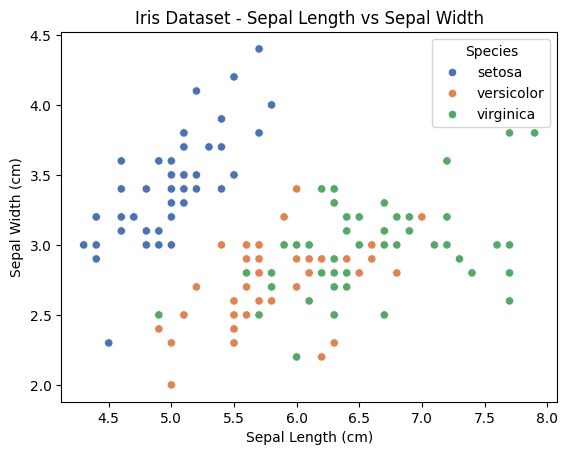

In [ ]:
sns.scatterplot(
    data=df,
    x='sepal length (cm)', 
    y='sepal width (cm)', 
    hue='species',
    palette='deep'
)

plt.title('Iris Dataset - Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

In [27]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

iris = datasets.load_iris()
X = iris.data   # Features
y = iris.target # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

